# <데이터 분석 프로젝트 보고서>
<hr>

1. 프로젝트 개요
- 프로젝트 명 :
- 프로젝트 목적 :
- 프로젝트 진행 배경 :
<hr>

2. 결론
- 작성하기
<hr> 

3. 문제 정의
- 문제 정의 시 기준을 명확히 할것 
<hr> 

4. 데이터 수집
- 수집 사이트 
- 수집 데이터 정의
<hr> 

5. 데이터 정제
- 전처리(결측치 및 이상치 처리) 과정
- 활용 데이터 정의
    * 데이터 분석에 필요한 데이터 정의 – 컬럼명 명확하게
<hr> 

6. 데이터 분석 및 시각화
- 분석 소주제
- 분석 결과
- 분석 데이터
- 분석 결과 시각화
    * 그래프 타이틀 및 범례 표시

## - 데이터 불러오기

In [169]:
# 날짜 모듈
import datetime

# 결측값 확인
import missingno as msno

# 그래프 그릴때 필요한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 글자 출력 오류 해결 
import matplotlib
import matplotlib.font_manager as fm

font_location = 'c:/windows/fonts/H2GTRE.TTF'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family = font_name)

import warnings as wa
# 오류 메세지 차단
wa.filterwarnings("ignore")

# pandas, numpy 모듈
import pandas as pd
import numpy as np

In [170]:
data = pd.read_csv('data/crime/경찰청_범죄 발생 지역별 통계_20151231.csv', encoding='cp949')

data

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,경기 과천,경기 광명,경기 광주,경기 구리,경기 군포,경기 김포,경기 남양주,경기 동두천,경기 부천,경기 성남,경기 수원,경기 시흥,경기 안산,경기 안성,경기 안양,경기 양주,경기 여주,경기 오산,경기 용인,경기 의왕,경기 의정부,경기 이천,경기 파주,경기 평택,경기 포천,경기 하남,경기 화성,강원 강릉,강원 동해,강원 삼척,강원 속초,강원 원주,강원 춘천,강원 태백,충북 제천,충북 청주,충북 충주,충남 계룡,충남 공주,충남 논산,충남 당진,충남 보령,충남 서산,충남 아산,충남 천안,전북 군산,전북 김제,전북 남원,전북 익산,전북 전주,전북 정읍,전남 광양,전남 나주,전남 목포,전남 순천,전남 여수,경북 경산,경북 경주,경북 구미,경북 김천,경북 문경,경북 상주,경북 안동,경북 영주,경북 영천,경북 포항,경남 거제,경남 김해,경남 마산,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,67,20,13,17,11,8,12,2,8,2,1,4,0,1,2,5,0,7,4,6,9,8,0,2,1,1,2,7,0,0,3,3,1,4,1,7,1,1,0,0,5,3,0,2,4,1,0,0,3,0,3,0,5,4,0,0,0,3,4,0,0,0,2,1,4,1,3,3,0,1,1,2,1,0,1,2,1,0,1,0,2,4,7,2,0,11,7,30
1,강력범죄,살인미수등,96,41,23,34,7,16,11,1,9,0,1,8,3,1,3,6,3,13,6,7,6,12,2,6,2,3,2,5,0,7,2,4,6,3,0,8,4,1,0,1,5,3,0,5,15,1,0,2,3,1,5,1,4,8,6,0,0,5,7,1,3,1,0,1,2,2,4,2,1,0,0,0,0,2,7,1,7,0,5,5,6,0,13,2,1,16,4,44
2,강력범죄,강도,274,161,60,103,44,64,29,0,14,0,4,4,6,5,7,12,0,25,30,38,14,42,2,7,5,5,4,11,1,15,8,5,20,3,1,12,8,0,0,0,9,9,0,2,30,6,0,0,4,3,3,6,2,22,7,1,2,14,21,0,1,0,9,9,6,14,9,13,3,1,1,0,9,5,10,4,17,0,1,4,2,13,26,3,4,29,4,65
3,강력범죄,강간,969,383,216,304,216,181,132,3,73,0,12,25,22,26,33,50,6,105,83,157,36,86,23,52,19,13,23,53,8,67,23,29,50,17,11,32,28,5,10,6,48,10,1,15,79,15,1,14,13,11,10,11,27,82,21,13,11,34,68,16,14,4,42,34,43,23,30,50,14,5,9,25,9,9,48,23,42,0,10,12,35,63,85,11,14,64,18,328
4,강력범죄,유사강간,118,24,21,35,17,14,10,1,9,0,0,3,1,2,5,2,0,12,12,21,5,2,0,4,1,0,2,9,0,10,3,3,6,1,1,4,5,1,0,2,2,9,3,2,4,5,0,1,1,0,4,7,2,6,2,0,1,3,4,1,1,1,1,5,2,2,2,6,1,2,1,2,1,0,4,2,1,0,1,1,3,1,8,1,1,12,0,33
5,강력범죄,강제추행,4282,991,645,924,495,362,293,34,256,20,77,49,73,67,75,132,36,291,319,425,171,242,42,180,44,17,81,209,30,157,59,89,161,47,25,133,56,32,12,20,75,71,8,26,229,55,6,27,39,32,26,48,64,177,62,17,21,59,176,24,19,5,81,72,51,54,55,81,25,12,13,36,23,14,90,62,114,1,20,22,59,58,172,36,32,165,28,764
6,강력범죄,기타강간강제추행등,94,37,20,31,22,12,9,0,7,0,2,2,3,0,2,9,0,7,14,23,6,6,3,4,3,2,2,7,0,6,4,2,4,3,0,2,1,1,3,2,7,7,2,3,12,0,0,1,0,1,1,2,2,10,4,3,0,2,6,1,2,1,3,3,1,1,3,4,2,1,1,4,4,0,8,1,7,0,1,2,1,4,13,3,1,11,2,55
7,강력범죄,방화,315,117,86,94,48,41,36,5,40,1,6,6,9,7,13,26,1,38,29,40,25,30,4,12,8,2,4,15,5,22,10,9,19,17,4,14,5,4,6,3,6,3,0,3,23,4,0,3,8,4,4,5,4,22,9,5,3,10,11,6,3,0,8,7,13,5,6,10,4,2,2,8,6,3,16,12,9,0,2,7,9,12,33,0,12,23,4,148
8,절도범죄,절도,55280,20136,12759,10679,8438,9495,5449,638,3287,170,1234,1072,1042,944,1082,1888,410,5048,3941,6487,1791,4154,844,2142,719,417,1164,2791,307,2304,655,1136,2160,580,575,2178,832,288,188,344,1785,1132,130,524,4691,925,53,423,634,1325,681,769,1487,3945,1470,344,276,1391,3402,565,461,46,1520,1188,1049,1174,1297,2212,506,227,322,679,245,298,2496,1395,2739,2,313,358,1205,2032,5860,602,921,3309,643,11754
9,폭력범죄,상해,7174,4675,2736,2179,1162,1516,1353,117,490,22,147,237,181,142,160,392,102,524,734,938,295,694,141,396,157,130,149,454,57,326,161,261,460,229,104,410,352,202,155,174,514,379,82,172,798,265,24,137,155,215,137,179,341,522,283,65,101,246,496,108,194,5,415,354,347,248,347,508,200,100,127,257,134,118,616,490,595,1,134,194,307,408,1187,321,269,532,149,3941


In [171]:
data1 = pd.read_csv('data/crime/경찰청_범죄 발생 장소별 통계_20221231.csv', encoding='cp949')
data1

,범죄대분류,범죄중분류,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,상점,시장_노점,숙박업소_목욕탕,유흥접객업소,사무실,공장,공사장_광산,창고,역_대합실,지하철,기타교통수단내,흥행장,유원지,학교,금융기관,의료기관,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
0,강력범죄,살인기수,114,60,0,28,0,0,1,0,1,1,9,8,8,1,0,0,1,0,3,0,3,1,0,7,1,3,3,0,0,0,5,0,0,17
1,강력범죄,살인미수등,123,85,0,105,0,1,0,1,4,0,5,24,13,2,0,1,1,0,8,0,2,0,1,6,1,3,0,0,0,0,5,2,1,33
2,강력범죄,강도,62,46,0,141,0,12,32,1,27,4,48,42,13,3,2,0,5,1,15,0,0,0,2,0,0,3,0,0,1,0,21,1,4,30
3,강력범죄,강간,1616,880,0,158,0,2,3,0,33,19,1644,196,55,2,2,3,2,0,131,1,20,15,0,11,7,9,0,1,0,1,45,48,3,560
4,강력범죄,유사강간,240,147,2,57,1,0,0,0,9,8,184,55,26,1,1,0,0,0,47,2,8,8,0,11,2,5,0,0,2,0,7,12,1,111
5,강력범죄,강제추행,1619,983,11,3098,34,86,277,11,373,150,843,2803,529,44,12,9,313,720,1017,95,258,340,18,301,45,32,2,20,8,0,114,65,37,1597
6,강력범죄,기타 강간?강제추행등,71,54,0,16,0,0,0,0,2,2,27,12,4,0,0,1,0,0,3,0,3,4,0,2,0,0,0,0,0,0,1,6,0,17
7,강력범죄,방화,331,274,1,207,0,5,6,1,31,26,41,36,36,14,6,10,7,1,2,3,11,5,5,15,2,15,4,0,0,2,32,8,3,93
8,절도범죄,절도범죄,17196,8117,115,51945,2274,11703,6994,3536,17550,3927,2738,8323,2146,1123,1207,1010,1175,585,2924,426,1771,1250,2493,946,574,3362,46,15,4,52,10381,703,994,14665
9,폭력범죄,상해,4160,2570,35,9150,13,88,126,12,339,248,581,3997,853,253,191,33,118,29,152,38,280,411,13,323,61,130,22,14,5,6,592,51,53,1859


In [174]:
data.info()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 90 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄대분류   38 non-null     object
 1   범죄중분류   38 non-null     object
 2   서울      38 non-null     int64 
 3   부산      38 non-null     int64 
 4   대구      38 non-null     int64 
 5   인천      38 non-null     int64 
 6   광주      38 non-null     int64 
 7   대전      38 non-null     int64 
 8   울산      38 non-null     int64 
 9   세종      38 non-null     int64 
 10  경기 고양   38 non-null     int64 
 11  경기 과천   38 non-null     int64 
 12  경기 광명   38 non-null     int64 
 13  경기 광주   38 non-null     int64 
 14  경기 구리   38 non-null     int64 
 15  경기 군포   38 non-null     int64 
 16  경기 김포   38 non-null     int64 
 17  경기 남양주  38 non-null     int64 
 18  경기 동두천  38 non-null     int64 
 19  경기 부천   38 non-null     int64 
 20  경기 성남   38 non-null     int64 
 21  경기 수원   38 non-null     int64 
 22  경기 시흥   38 non-null     int6

## - 결측값 확인하기

<Axes: >

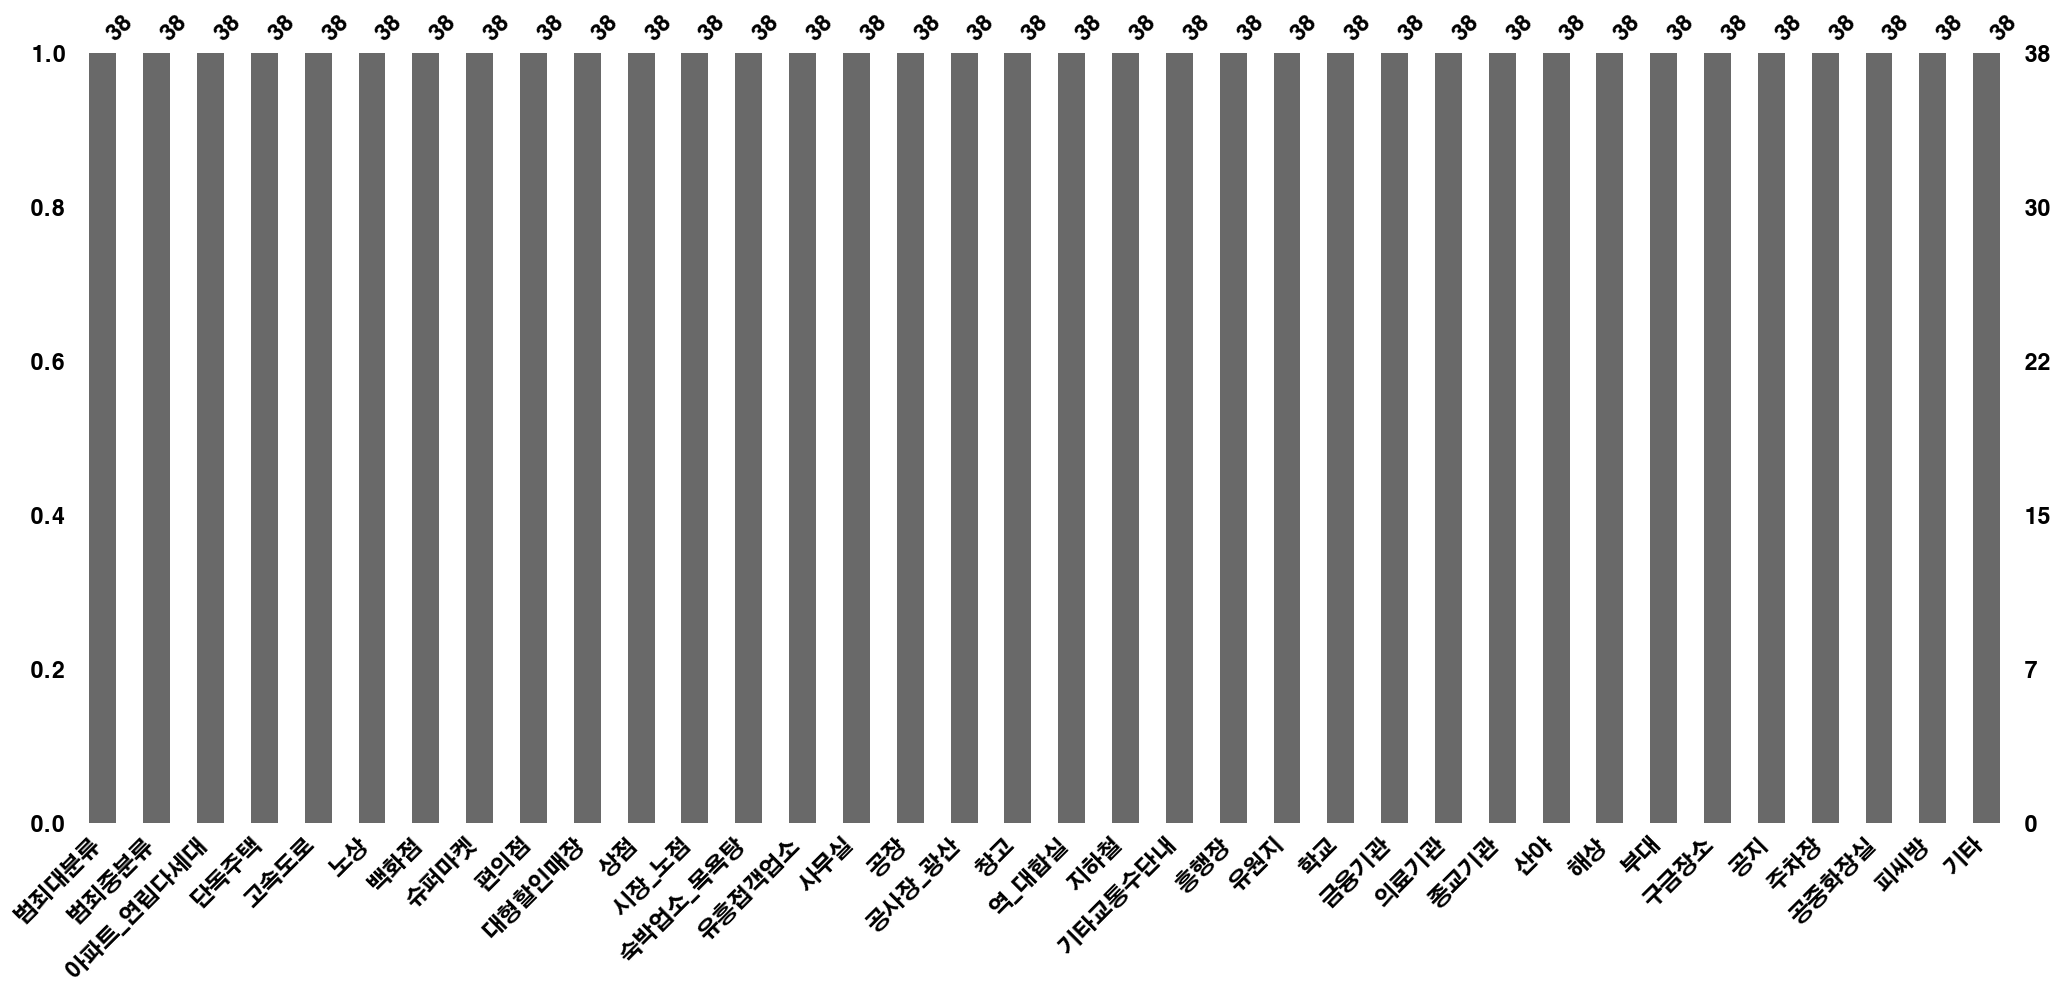

In [176]:
# msno.bar(data)
msno.bar(data1)

In [177]:
# data.isna().sum()
data1.isna().sum()

범죄대분류        0
범죄중분류        0
아파트_연립다세대    0
단독주택         0
고속도로         0
노상           0
백화점          0
슈퍼마켓         0
편의점          0
대형할인매장       0
상점           0
시장_노점        0
숙박업소_목욕탕     0
유흥접객업소       0
사무실          0
공장           0
공사장_광산       0
창고           0
역_대합실        0
지하철          0
기타교통수단내      0
흥행장          0
유원지          0
학교           0
금융기관         0
의료기관         0
종교기관         0
산야           0
해상           0
부대           0
구금장소         0
공지           0
주차장          0
공중화장실        0
피씨방          0
기타           0
dtype: int64

In [180]:
# data.dtypes
data1.dtypes

범죄대분류        object
범죄중분류        object
아파트_연립다세대     int64
단독주택          int64
고속도로          int64
노상            int64
백화점           int64
슈퍼마켓          int64
편의점           int64
대형할인매장        int64
상점            int64
시장_노점         int64
숙박업소_목욕탕      int64
유흥접객업소        int64
사무실           int64
공장            int64
공사장_광산        int64
창고            int64
역_대합실         int64
지하철           int64
기타교통수단내       int64
흥행장           int64
유원지           int64
학교            int64
금융기관          int64
의료기관          int64
종교기관          int64
산야            int64
해상            int64
부대            int64
구금장소          int64
공지            int64
주차장           int64
공중화장실         int64
피씨방           int64
기타            int64
dtype: object

In [19]:
# 모든 열을 출력한다.
pd.set_option('display.max_columns', None)

# 모든 행을 출력한다.
pd.set_option('display.max_row', None) 

## 1. 제일 많이 일어나는 범죄(대분류)

In [375]:
# 범죄 대분류의 갯수
data.groupby(['범죄대분류']).count()

,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,경기 과천,경기 광명,경기 광주,경기 구리,경기 군포,경기 김포,경기 남양주,경기 동두천,경기 부천,경기 성남,경기 수원,경기 시흥,경기 안산,경기 안성,경기 안양,경기 양주,경기 여주,경기 오산,경기 용인,경기 의왕,경기 의정부,경기 이천,경기 파주,경기 평택,경기 포천,경기 하남,경기 화성,강원 강릉,강원 동해,강원 삼척,강원 속초,강원 원주,강원 춘천,강원 태백,충북 제천,충북 청주,충북 충주,충남 계룡,충남 공주,충남 논산,충남 당진,충남 보령,충남 서산,충남 아산,충남 천안,전북 군산,전북 김제,전북 남원,전북 익산,전북 전주,전북 정읍,전남 광양,전남 나주,전남 목포,전남 순천,전남 여수,경북 경산,경북 경주,경북 구미,경북 김천,경북 문경,경북 상주,경북 안동,경북 영주,경북 영천,경북 포항,경남 거제,경남 김해,경남 마산,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
범죄대분류,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강력범죄,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
교통범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
기타범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
노동범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
마약범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
병역범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
보건범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
선거범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
안보범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [376]:
# 범죄대분류를 기준으로 한 합계 
crime_class = data.groupby('범죄대분류').sum()
crime_class

,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,경기 과천,경기 광명,경기 광주,경기 구리,경기 군포,경기 김포,경기 남양주,경기 동두천,경기 부천,경기 성남,경기 수원,경기 시흥,경기 안산,경기 안성,경기 안양,경기 양주,경기 여주,경기 오산,경기 용인,경기 의왕,경기 의정부,경기 이천,경기 파주,경기 평택,경기 포천,경기 하남,경기 화성,강원 강릉,강원 동해,강원 삼척,강원 속초,강원 원주,강원 춘천,강원 태백,충북 제천,충북 청주,충북 충주,충남 계룡,충남 공주,충남 논산,충남 당진,충남 보령,충남 서산,충남 아산,충남 천안,전북 군산,전북 김제,전북 남원,전북 익산,전북 전주,전북 정읍,전남 광양,전남 나주,전남 목포,전남 순천,전남 여수,경북 경산,경북 경주,경북 구미,경북 김천,경북 문경,경북 상주,경북 안동,경북 영주,경북 영천,경북 포항,경남 거제,경남 김해,경남 마산,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
범죄대분류,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강력범죄,6215,1774,1084,1542,860,698,532,46,416,23,103,101,117,109,140,242,46,498,497,717,272,428,76,267,83,43,120,316,44,284,112,144,267,95,43,212,108,45,31,34,157,115,14,58,396,87,7,48,71,52,56,80,110,331,111,39,38,130,297,49,43,12,146,132,122,102,112,169,50,24,28,77,53,33,184,107,198,1,41,53,117,155,357,58,65,331,67,1467
교통범죄,74958,35841,39725,31163,23412,13556,16600,1056,11926,720,2740,3660,2151,2121,3726,4795,954,10467,8900,14715,7830,11372,2490,5909,2547,1687,2009,7716,1722,3670,2653,6218,7646,2677,2583,5902,2737,1519,1110,1436,6012,5008,594,1839,8972,3902,138,1230,1182,1943,1703,1767,2296,9104,3497,997,752,3202,6444,1115,2434,276,4699,4954,5083,2464,4839,8505,2121,1005,1160,1750,1644,1346,7475,4832,8691,2,1216,2517,3759,3351,12650,2936,3581,10857,2325,43877
기타범죄,41752,19868,9766,13677,5301,4602,4881,462,3473,174,1138,1135,699,672,1205,2361,372,3804,3297,4856,1961,3293,939,1924,847,368,913,2304,305,1642,829,1355,2122,881,482,2058,899,397,739,333,1130,910,140,443,2838,697,61,393,505,1384,959,669,888,2693,1765,297,255,1142,2262,401,424,140,1471,811,2846,802,1239,1307,464,190,229,532,242,268,2130,957,2018,12,410,1040,978,933,3643,1594,1331,3130,1341,17797
노동범죄,215,190,31,28,13,14,63,0,13,0,6,13,2,4,4,6,0,21,9,28,5,26,3,34,5,1,1,5,0,5,0,5,29,2,1,15,15,0,0,5,2,2,0,1,7,1,0,0,3,2,1,2,0,11,5,0,3,1,34,2,2,0,18,16,6,6,3,13,6,0,1,6,3,0,15,14,14,0,0,1,10,0,19,43,3,6,1,45
마약범죄,1360,759,393,557,69,78,67,2,82,4,15,22,16,15,13,24,25,56,79,118,41,71,92,37,25,114,18,137,6,103,10,48,124,38,10,56,5,2,1,0,61,39,2,63,73,18,0,7,3,19,10,18,36,52,7,1,2,5,32,1,7,0,13,14,23,11,28,44,17,11,17,19,11,27,19,22,121,1,43,24,25,90,122,10,6,20,16,509
병역범죄,4591,959,800,1200,371,630,382,86,360,10,61,170,71,53,50,312,44,355,362,433,228,332,101,201,137,19,104,235,34,188,71,142,156,105,36,225,33,23,9,8,110,79,3,22,316,53,6,25,72,49,20,36,99,414,82,12,19,55,186,27,38,1,98,91,82,82,76,214,37,5,32,38,14,31,243,112,198,1,57,42,158,92,355,52,52,190,155,808
보건범죄,3941,1832,417,654,760,204,230,15,223,6,90,87,62,45,68,261,20,162,244,368,302,134,51,88,77,22,32,170,19,86,41,102,94,50,41,186,37,23,7,34,93,31,7,44,96,56,1,4,21,26,33,20,57,63,97,18,26,88,144,37,15,9,42,24,78,34,53,118,25,8,17,18,11,21,100,71,126,1,51,29,57,123,258,19,37,131,36,843
선거범죄,24,24,18,19,9,8,15,5,4,1,3,0,2,0,3,0,0,0,2,2,3,1,7,3,1,8,0,8,1,0,9,11,8,0,0,6,7,1,4,1,1,1,0,12,5,1,0,3,5,7,10,3,4,1,0,10,6,2,9,7,5,6,6,5,7,4,9,9,11,3,17,2,0,3,5,3,4,0,4,5,3,30,17,4,12,11,3,267
안보범죄,38,4,4,20,3,4,2,0,1,0,1,0,0,0,0,0,0,2,2,3,0,2,0,2,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,11,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,6


In [377]:
# 범죄대분류별 합계 계산
# axis=1 은 같은 행별로 계산하는 옵션
crime_class_sum = np.sum(crime_class.groupby('범죄대분류').sum(), axis=1) 
crime_class_sum

범죄대분류
강력범죄       25334
교통범죄      596665
기타범죄      216197
노동범죄        1145
마약범죄        6411
병역범죄       18726
보건범죄       14602
선거범죄         760
안보범죄         121
절도범죄      245853
지능범죄      316121
특별경제범죄     86329
폭력범죄      305947
풍속범죄       24491
환경범죄        2955
dtype: int64

In [400]:
# 데이터프레임 형식으로 인덱스 재설정
crime_class_g = pd.DataFrame(crime_class_sum).reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_g.rename(columns = {0:'총 합계'}, inplace = True)

# 총 합계를 기준으로 내림차순 정렬
#  ascending=False: 내림차순, True는 오름차순
crime_class_g.sort_values(by='총 합계', ascending=False, inplace = True)

crime_class_g

,범죄대분류,총 합계
1,교통범죄,596665
10,지능범죄,316121
12,폭력범죄,305947
9,절도범죄,245853
2,기타범죄,216197
11,특별경제범죄,86329
0,강력범죄,25334
13,풍속범죄,24491
5,병역범죄,18726
6,보건범죄,14602


In [385]:
# 전치로 행과 열 변환 후 수치 확인해보기
data_ratio = pd.DataFrame(crime_class_g).T
data_ratio

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
총 합계,25334,596665,216197,1145,6411,18726,14602,760,121,245853,316121,86329,305947,24491,2955


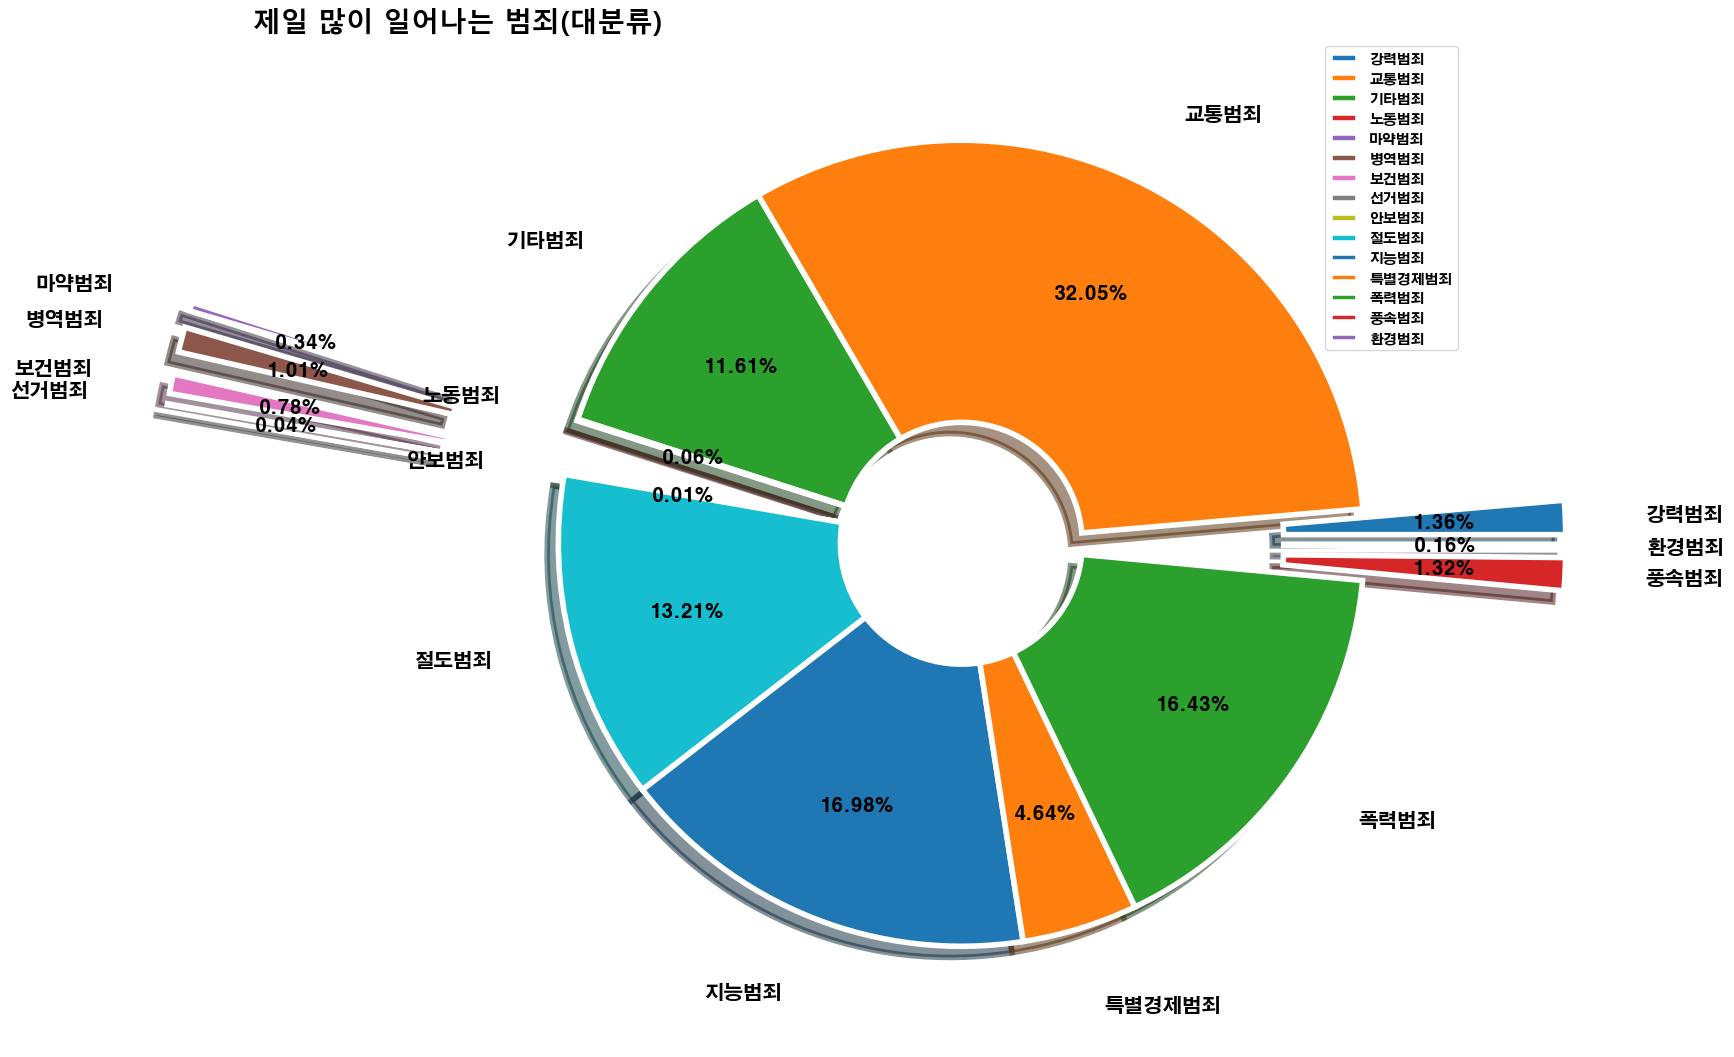

In [387]:
# pie는 labels이 있어야 출력된다. 
labels = ['강력범죄', '교통범죄', '기타범죄', '노동범죄', '마약범죄',
          '병역범죄', '보건범죄', '선거범죄', '안보범죄', '절도범죄',
          '지능범죄', '특별경제범죄', '폭력범죄', '풍속범죄', '환경범죄']

# explode: 부채꼴이 파이 차트의 중심에서 벗어나는 정도
explode = [0.5, 0, 0, 0, 1, 
           1, 1, 1, 0, 0,
           0, 0, 0, 0.5, 0.5]

# wedgeprops: 테두리를 추가한다.
wedgeprops = ({'edgecolor' : 'w', 'width' : 0.7, "linewidth":4})

# startangle: 파이 차트의 각도를 돌린다.
plt.figure(figsize=(13, 20))
plt.pie(crime_class_sum, labels=labels, autopct='%1.2f%%', wedgeprops=wedgeprops, pctdistance=0.7, labeldistance=1.2,
        explode=explode, textprops={'size' : 14}, shadow=True
#         startangle=50
       )
plt.title('제일 많이 일어나는 범죄(대분류)', fontsize=20, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.legend(loc='best')
plt.show()

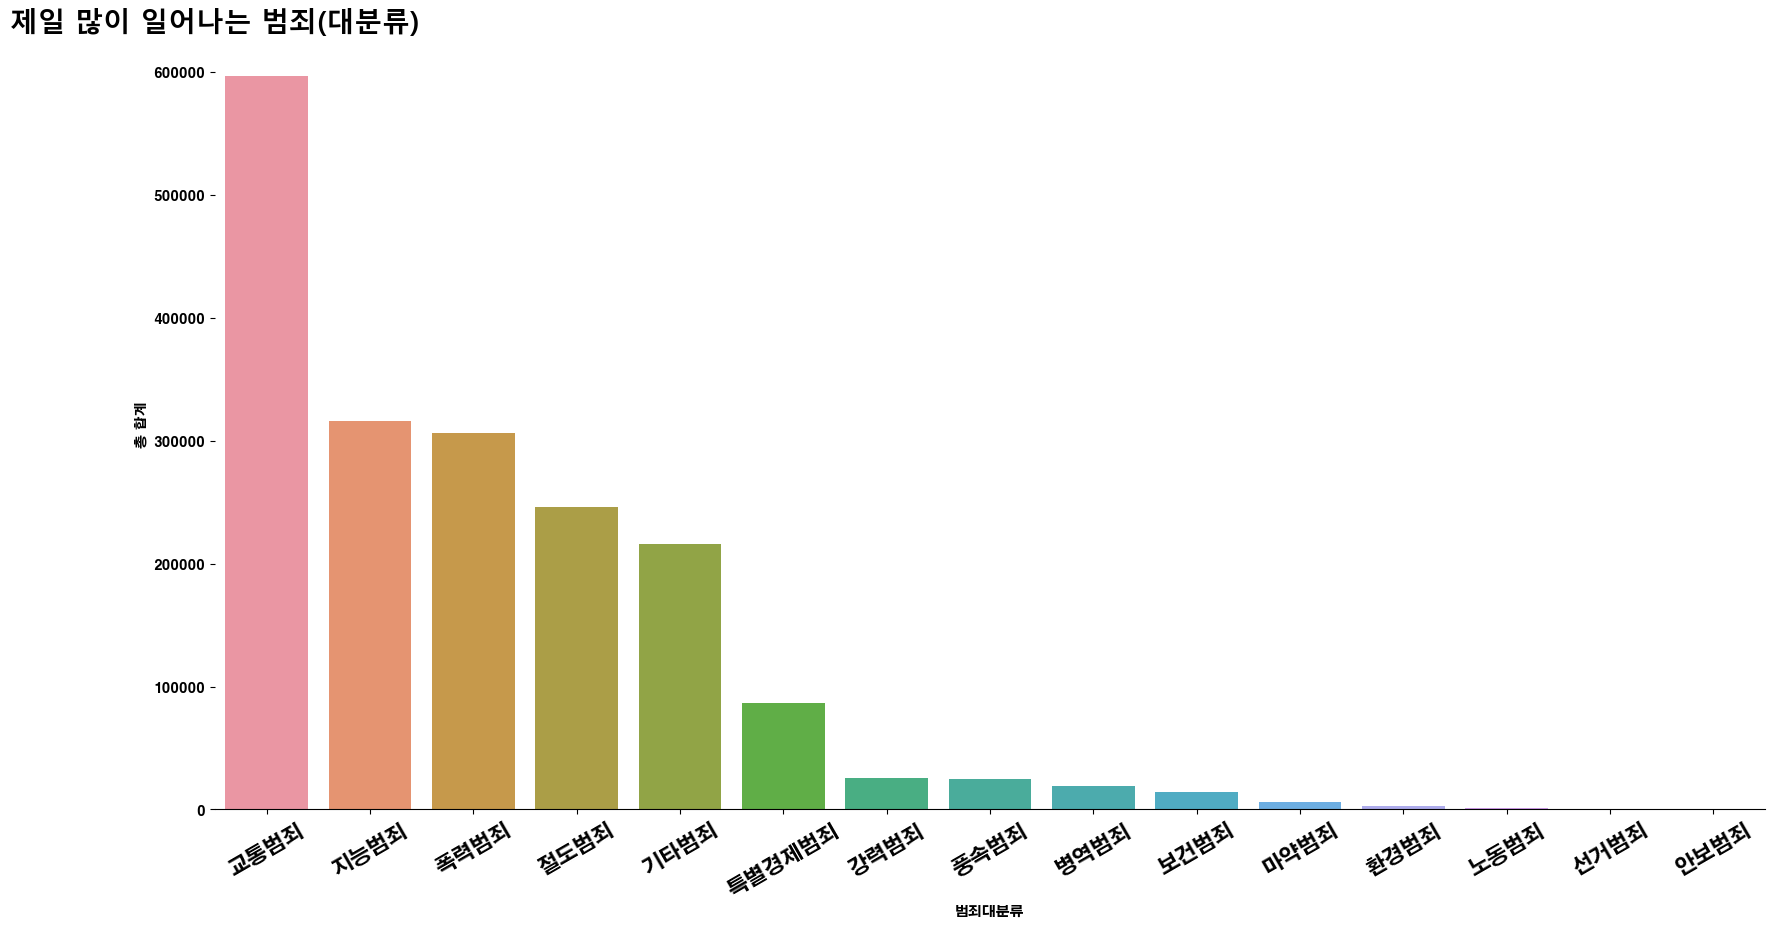

In [401]:
plt.figure(figsize=(20, 10))
sns.barplot(x='범죄대분류', y='총 합계', data=crime_class_g)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('제일 많이 일어나는 범죄(대분류)', fontsize=20, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=30, fontsize=15)
plt.show()

## 2.  제일 많이 일어나는 범죄(중분류)

In [359]:
# 범죄중분류를 기준으로 한 합계 
crime_class_s = data.groupby('범죄중분류').sum()
crime_class_s

,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,경기 과천,경기 광명,경기 광주,경기 구리,경기 군포,경기 김포,경기 남양주,경기 동두천,경기 부천,경기 성남,경기 수원,경기 시흥,경기 안산,경기 안성,경기 안양,경기 양주,경기 여주,경기 오산,경기 용인,경기 의왕,경기 의정부,경기 이천,경기 파주,경기 평택,경기 포천,경기 하남,경기 화성,강원 강릉,강원 동해,강원 삼척,강원 속초,강원 원주,강원 춘천,강원 태백,충북 제천,충북 청주,충북 충주,충남 계룡,충남 공주,충남 논산,충남 당진,충남 보령,충남 서산,충남 아산,충남 천안,전북 군산,전북 김제,전북 남원,전북 익산,전북 전주,전북 정읍,전남 광양,전남 나주,전남 목포,전남 순천,전남 여수,경북 경산,경북 경주,경북 구미,경북 김천,경북 문경,경북 상주,경북 안동,경북 영주,경북 영천,경북 포항,경남 거제,경남 김해,경남 마산,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
범죄중분류,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강간,969,383,216,304,216,181,132,3,73,0,12,25,22,26,33,50,6,105,83,157,36,86,23,52,19,13,23,53,8,67,23,29,50,17,11,32,28,5,10,6,48,10,1,15,79,15,1,14,13,11,10,11,27,82,21,13,11,34,68,16,14,4,42,34,43,23,30,50,14,5,9,25,9,9,48,23,42,0,10,12,35,63,85,11,14,64,18,328
강도,274,161,60,103,44,64,29,0,14,0,4,4,6,5,7,12,0,25,30,38,14,42,2,7,5,5,4,11,1,15,8,5,20,3,1,12,8,0,0,0,9,9,0,2,30,6,0,0,4,3,3,6,2,22,7,1,2,14,21,0,1,0,9,9,6,14,9,13,3,1,1,0,9,5,10,4,17,0,1,4,2,13,26,3,4,29,4,65
강제추행,4282,991,645,924,495,362,293,34,256,20,77,49,73,67,75,132,36,291,319,425,171,242,42,180,44,17,81,209,30,157,59,89,161,47,25,133,56,32,12,20,75,71,8,26,229,55,6,27,39,32,26,48,64,177,62,17,21,59,176,24,19,5,81,72,51,54,55,81,25,12,13,36,23,14,90,62,114,1,20,22,59,58,172,36,32,165,28,764
공갈,634,558,263,222,118,94,79,4,34,1,19,17,17,5,10,21,9,82,47,89,33,49,17,37,11,4,14,47,3,26,5,15,26,7,12,24,18,4,2,4,27,7,1,6,36,10,0,9,10,5,7,13,18,23,16,7,5,25,57,1,10,1,20,12,19,18,18,23,4,1,7,15,8,25,26,9,25,0,9,0,16,19,87,11,8,37,26,178
교통범죄,74958,35841,39725,31163,23412,13556,16600,1056,11926,720,2740,3660,2151,2121,3726,4795,954,10467,8900,14715,7830,11372,2490,5909,2547,1687,2009,7716,1722,3670,2653,6218,7646,2677,2583,5902,2737,1519,1110,1436,6012,5008,594,1839,8972,3902,138,1230,1182,1943,1703,1767,2296,9104,3497,997,752,3202,6444,1115,2434,276,4699,4954,5083,2464,4839,8505,2121,1005,1160,1750,1644,1346,7475,4832,8691,2,1216,2517,3759,3351,12650,2936,3581,10857,2325,43877
기타강간강제추행등,94,37,20,31,22,12,9,0,7,0,2,2,3,0,2,9,0,7,14,23,6,6,3,4,3,2,2,7,0,6,4,2,4,3,0,2,1,1,3,2,7,7,2,3,12,0,0,1,0,1,1,2,2,10,4,3,0,2,6,1,2,1,3,3,1,1,3,4,2,1,1,4,4,0,8,1,7,0,1,2,1,4,13,3,1,11,2,55
기타범죄,41752,19868,9766,13677,5301,4602,4881,462,3473,174,1138,1135,699,672,1205,2361,372,3804,3297,4856,1961,3293,939,1924,847,368,913,2304,305,1642,829,1355,2122,881,482,2058,899,397,739,333,1130,910,140,443,2838,697,61,393,505,1384,959,669,888,2693,1765,297,255,1142,2262,401,424,140,1471,811,2846,802,1239,1307,464,190,229,532,242,268,2130,957,2018,12,410,1040,978,933,3643,1594,1331,3130,1341,17797
노동범죄,215,190,31,28,13,14,63,0,13,0,6,13,2,4,4,6,0,21,9,28,5,26,3,34,5,1,1,5,0,5,0,5,29,2,1,15,15,0,0,5,2,2,0,1,7,1,0,0,3,2,1,2,0,11,5,0,3,1,34,2,2,0,18,16,6,6,3,13,6,0,1,6,3,0,15,14,14,0,0,1,10,0,19,43,3,6,1,45
도박범죄,1320,921,485,390,216,251,146,7,108,1,34,42,22,33,52,53,13,115,115,343,89,131,17,69,25,16,13,63,14,39,28,34,52,19,50,53,19,8,12,18,48,24,4,22,154,33,6,13,29,45,17,38,46,105,53,23,20,51,92,20,29,0,59,78,49,36,57,66,26,9,11,25,19,12,124,113,56,0,16,10,24,27,124,89,38,106,46,744


In [362]:
# axis=1 은 같은 행별로 계산하는 옵션
crime_class_s_sum = np.sum(crime_class_s.groupby('범죄중분류').sum(), axis=1) 
crime_class_s_sum

범죄중분류
강간             5151
강도             1446
강제추행          15059
공갈             3596
교통범죄         596665
기타강간강제추행등       558
기타범죄         216197
노동범죄           1145
도박범죄           8272
마약범죄           6411
문서인장          14546
방화             1673
배임             4289
병역범죄          18726
보건범죄          14602
사기           247293
살인기수            365
살인미수등           564
상해            48005
선거범죄            760
성풍속범죄         16219
손괴            58977
안보범죄            121
약취유인            190
유가증권인지          282
유사강간            518
절도           245853
증수뢰             247
직권남용            401
직무유기            507
체포감금           1028
통화             1822
특별경제범죄        86329
폭력행위등         35686
폭행           149278
협박             9187
환경범죄           2955
횡령            46734
dtype: int64

In [397]:
# 데이터프레임 형식으로 인덱스 재설정
# reset_index(): 기존 행 인덱스를 제거하고 인덱스를 데이터 열 추가
crime_class_s_g = pd.DataFrame(crime_class_s_sum).reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_s_g.rename(columns = {0:'총 합계'}, inplace = True)

# 총 합계를 기준으로 내림차순 정렬
#  ascending=False: 내림차순, True는 오름차순
crime_class_s_g.sort_values(by='총 합계', ascending=False, inplace = True)

crime_class_s_g

,범죄중분류,총 합계
4,교통범죄,596665
15,사기,247293
26,절도,245853
6,기타범죄,216197
34,폭행,149278
32,특별경제범죄,86329
21,손괴,58977
18,상해,48005
37,횡령,46734
33,폭력행위등,35686


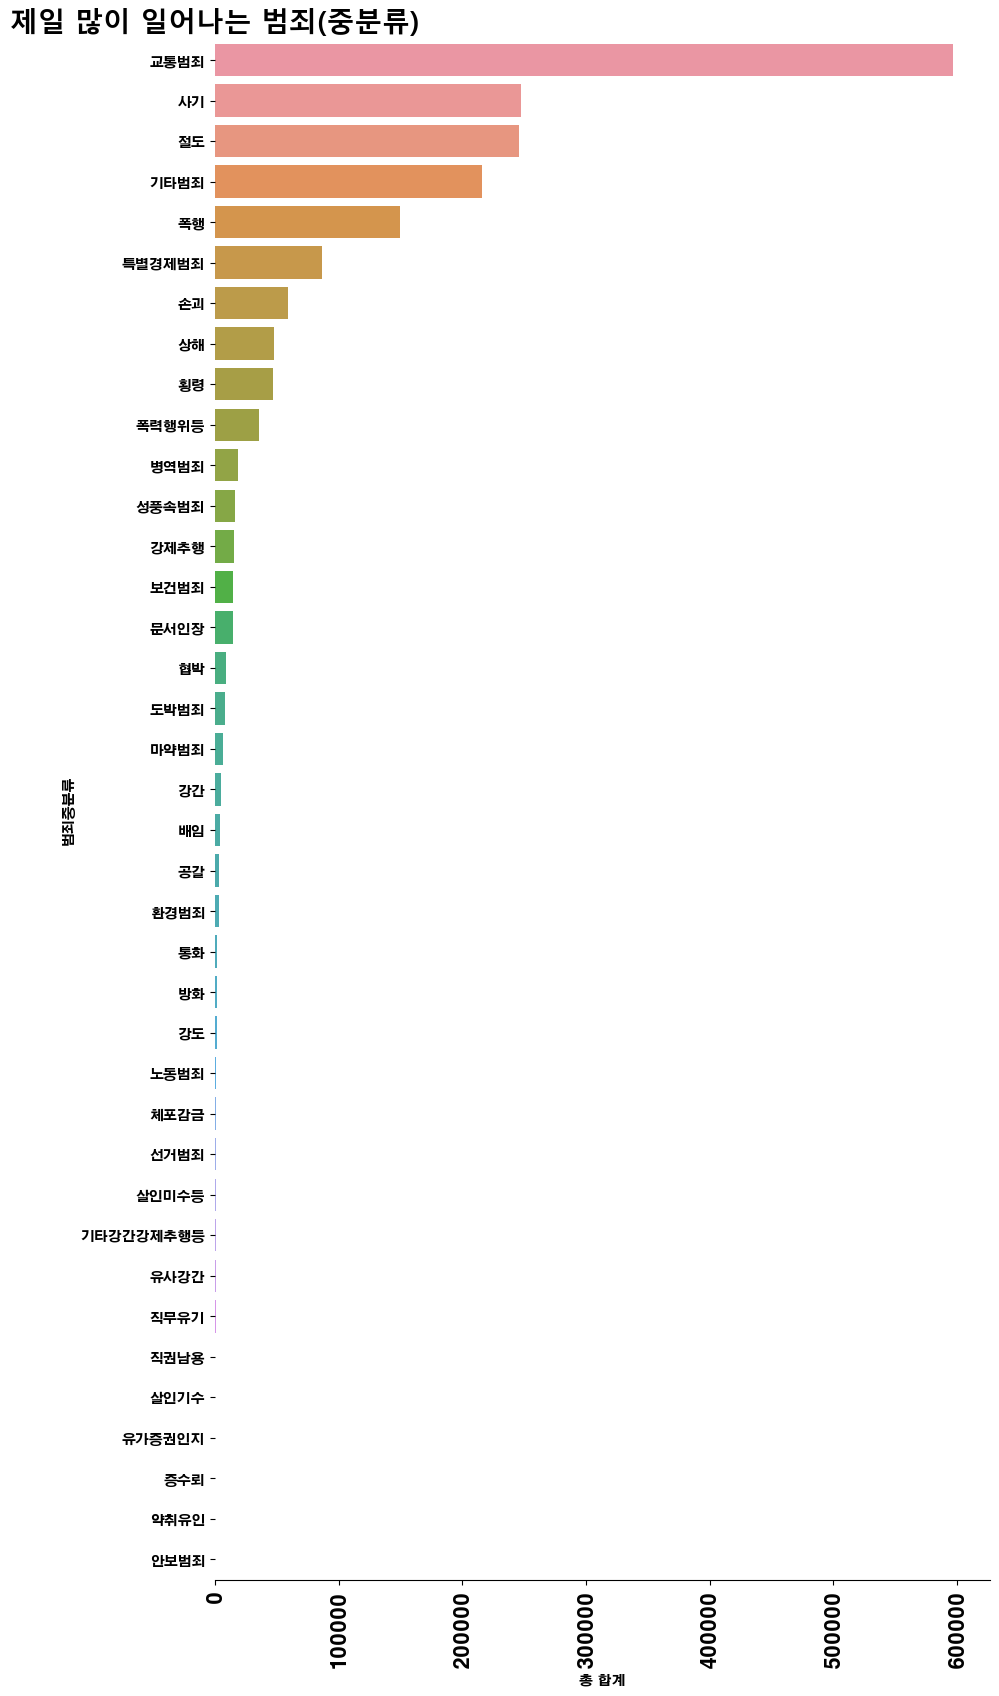

In [399]:
plt.figure(figsize=(10, 20))
sns.barplot(x='총 합계', y='범죄중분류', data=crime_class_s_g)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('제일 많이 일어나는 범죄(중분류)', fontsize=20, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=90, fontsize=15)
plt.show()

## 3. 지역별 범죄대분류 

In [416]:
# 범죄 대분류의 갯수확인과 T로 행,열 위치 교체
data.groupby(['범죄대분류']).count().T

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
범죄중분류,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
서울,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
부산,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
대구,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
인천,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
광주,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
대전,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
울산,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
세종,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
경기 고양,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1


In [446]:
# 범죄대분류를 기준으로 행,열 위치 교체와 지역별 합계 
crime_class_t = data.groupby('범죄대분류').sum().T
crime_class_t

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
서울,6215,74958,41752,215,1360,4591,3941,24,38,55280,72851,22075,65247,6741,53
부산,1774,35841,19868,190,759,959,1832,24,4,20136,25247,13868,20928,2085,198
대구,1084,39725,9766,31,393,800,417,18,4,12759,14195,3421,14708,1418,19
인천,1542,31163,13677,28,557,1200,654,19,20,10679,16938,5751,18054,1580,69
광주,860,23412,5301,13,69,371,760,9,3,8438,9724,2535,9602,592,8
대전,698,13556,4602,14,78,630,204,8,4,9495,9112,1635,8839,689,13
울산,532,16600,4881,63,67,382,230,15,2,5449,6898,1289,8277,403,53
세종,46,1056,462,0,2,86,15,5,0,638,680,187,452,29,2
경기 고양,416,11926,3473,13,82,360,223,4,1,3287,5441,1278,4248,396,30
경기 과천,23,720,174,0,4,10,6,1,0,170,280,60,215,25,3


In [447]:
# 기존에 있는 범죄 대분류의 행의 값을 새로운 열로 생성
crime_class_t = crime_class_t.reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_t.rename(columns = {'index' : '세부지역'}, inplace = True)

crime_class_t

범죄대분류,세부지역,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
0,서울,6215,74958,41752,215,1360,4591,3941,24,38,55280,72851,22075,65247,6741,53
1,부산,1774,35841,19868,190,759,959,1832,24,4,20136,25247,13868,20928,2085,198
2,대구,1084,39725,9766,31,393,800,417,18,4,12759,14195,3421,14708,1418,19
3,인천,1542,31163,13677,28,557,1200,654,19,20,10679,16938,5751,18054,1580,69
4,광주,860,23412,5301,13,69,371,760,9,3,8438,9724,2535,9602,592,8
5,대전,698,13556,4602,14,78,630,204,8,4,9495,9112,1635,8839,689,13
6,울산,532,16600,4881,63,67,382,230,15,2,5449,6898,1289,8277,403,53
7,세종,46,1056,462,0,2,86,15,5,0,638,680,187,452,29,2
8,경기 고양,416,11926,3473,13,82,360,223,4,1,3287,5441,1278,4248,396,30
9,경기 과천,23,720,174,0,4,10,6,1,0,170,280,60,215,25,3
